In [36]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score, mean_squared_error

# Ex. 1 - kNN - own implementation

In [37]:
iris = datasets.load_iris()
 
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3, train_size=0.7)

In [38]:
# print(features_test.shape)
# print(labels_test.shape)
# print(features_train.shape)
# print(labels_train.shape)


#An example of using the Euclidean distance
# a = (1, 2, 3)
# b = (4, 5, 6)
# dst = distance.euclidean(a, b)

output = []
err1 = []
k_list = list(range(1,31))
for k in k_list:

    predictions = []
    for t in features_test:
        m = features_train.shape[0]
        dist = []
        labels = list(labels_train)

        for i in features_train:
            dist.append(distance.euclidean(t, i))
        
        df = pd.DataFrame({
            'distance': dist,
            'label':labels
        })

        new_df = df.sort_values('distance')
        sel = new_df.iloc[:k]
        predictions.append(sel['label'].value_counts().idxmax())


    # Checking the effectiveness of the classifier
    err1.append(mean_squared_error(labels_test, predictions))
    output.append(accuracy_score(labels_test, predictions))
print(output)
print(f'\nHighest accuracy: {max(output)}')

[0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9111111111111111, 0.9333333333333333, 0.9111111111111111, 0.9333333333333333, 0.9111111111111111, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.8888888888888888, 0.9333333333333333]

Highest accuracy: 0.9777777777777777


# Ex. 2 - kNN - Python (sklearn)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn_output = []
for k in k_list:
    knn = KNeighborsClassifier(k)
    knn.fit(features_train, labels_train)
    pred_knn = knn.predict(features_test)
    knn_output.append(accuracy_score(labels_test, pred_knn))

print(knn_output)
print(f'\nAccuracy: {max(knn_output)}')

[0.9555555555555556, 0.9333333333333333, 0.9777777777777777, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9111111111111111, 0.9333333333333333, 0.9111111111111111, 0.9333333333333333, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888]

Accuracy: 0.9777777777777777


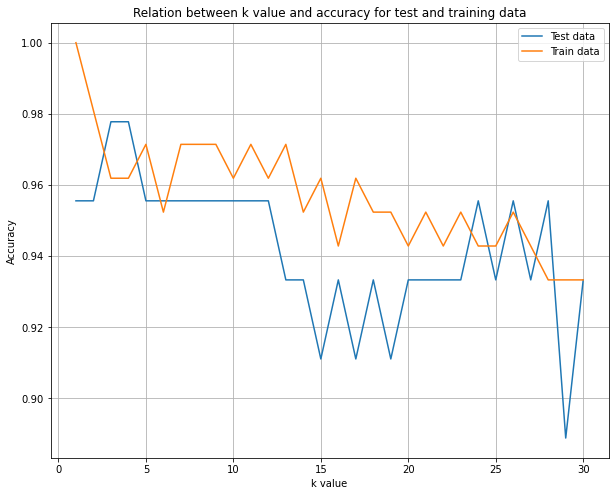

In [40]:
import matplotlib.pyplot as plt

knn2_output = []
err2 = []
for k in k_list:
    knn = KNeighborsClassifier(k)
    knn.fit(features_train, labels_train)
    pred_knn = knn.predict(features_train)
    knn2_output.append(accuracy_score(labels_train, pred_knn))
    err2.append(mean_squared_error(labels_train, pred_knn))


plt.figure(figsize=(10,8))

plt.plot(k_list, output)
plt.plot(k_list, knn2_output)

plt.title('Relation between k value and accuracy for test and training data')
plt.xlabel('k value')
plt.ylabel('Accuracy')

plt.legend(['Test data','Train data'])
plt.grid()
plt.show()

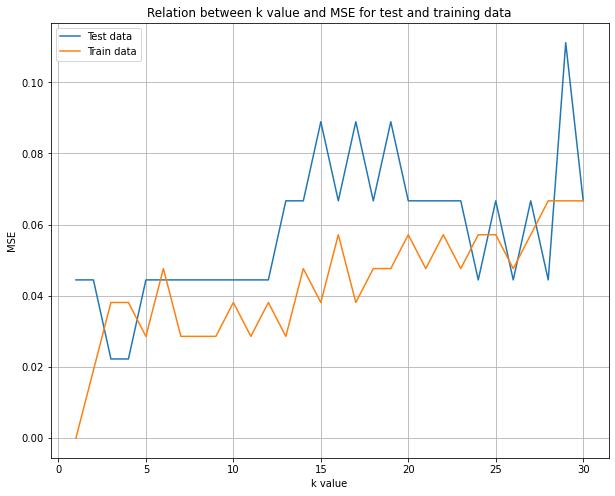

In [52]:
plt.figure(figsize=(10,8))

plt.plot(k_list, err1)
plt.plot(k_list, err2)

plt.title('Relation between k value and MSE for test and training data')
plt.xlabel('k value')
plt.ylabel('MSE')

plt.legend(['Test data','Train data'])
plt.grid()
plt.show()

# Ex.3 - Decision trees

### Example for iris

In [41]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

prediction = clf.predict(iris.data[:1, :])

probability = clf.predict_proba(iris.data[:1, :])

In [42]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf") # Write doesn't work, but write_pdf works

### Exercise

In [43]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
 
 
# wczytywanie danych
train = np.loadtxt("mnist_train.csv", 
                        delimiter=",")
test = np.loadtxt("mnist_test.csv", 
                       delimiter=",") 

In [44]:
#Ex.1.Divide the data into parameters X and answer y:
X_train = train[:,1:]
y_train = train[:,0]

# Standardization
for i in range(X_train.shape[0]):
    X_train[i,:] = X_train[i,:]/np.std(X_train[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
y_train[np.where(y_train==10)]=0
 
# the height and width of the picture with the number
h = 28
w = 28
 
# Ex 2. Please display the number of digits and the number of pixels per image
digits, pixels = X_train.shape
print(f'X : {X_train.shape}')

print(f'y : {y_train.shape}')


X : (60000, 784)
y : (60000,)


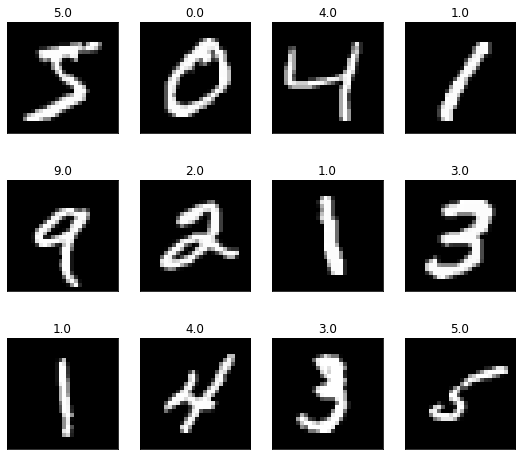

In [45]:
# Please display sample digits from the dataset (functionplot_mnist).

def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)

    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
        
plot_mnist(X_train, y_train, w, h, n_row=3, n_col=4)

In [46]:
# Please divide the dataset into learner (70%) and training.

# Already divided in excel.csv
X_train = train[:,1:]
y_train = train[:,0]

X_test = train[:,1:]
y_test = train[:,0]

In [47]:
# Create an instance of the classifier, then train and predict for test data.
DEPTH = 10
clf = tree.DecisionTreeClassifier(max_depth=DEPTH)

# 10 to wartość, przy której widoczny jest błąd
# Im większa wartość tym błędy są mniejsze, ale czas wykonania dłuższy
# Im mniejsza, tym większe błędy, widoczne już przy wartości 8

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [48]:
# Please provide F1 result, confusion matrix and classification report.
print('F1 result:')
f1_score(y_test, y_pred, average=None)

F1 result:


array([0.93898534, 0.95047031, 0.8734783 , 0.85560434, 0.88064123,
       0.85895317, 0.92769348, 0.88659306, 0.84322706, 0.83321183])

In [49]:
print('Confusion matrix:')
confusion_matrix(y_test, y_pred)

Confusion matrix:


array([[5571,    7,   53,   59,   24,   47,   24,   51,   58,   29],
       [  11, 6467,   40,   84,   30,   19,   19,   31,   32,    9],
       [  77,   47, 5202,   96,   75,   58,   67,  121,  140,   75],
       [  29,   34,  215, 5164,   34,  214,   47,  108,  138,  148],
       [  27,   39,   45,   52, 5054,   36,   55,  104,   71,  359],
       [  78,   25,   49,  139,   56, 4677,  121,   49,  116,  111],
       [  68,   24,   55,   12,   81,  114, 5472,    3,   68,   21],
       [  30,   43,   89,   63,   42,   32,    3, 5621,   31,  311],
       [  29,  166,  158,  119,   81,  131,   63,  127, 4787,  190],
       [  23,   14,   47,  152,  159,  141,    8,  200,   62, 5143]],
      dtype=int64)

In [50]:
print('Classification report:')
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      5923
         1.0       0.94      0.96      0.95      6742
         2.0       0.87      0.87      0.87      5958
         3.0       0.87      0.84      0.86      6131
         4.0       0.90      0.87      0.88      5842
         5.0       0.86      0.86      0.86      5421
         6.0       0.93      0.92      0.93      5918
         7.0       0.88      0.90      0.89      6265
         8.0       0.87      0.82      0.84      5851
         9.0       0.80      0.86      0.83      5949

    accuracy                           0.89     60000
   macro avg       0.89      0.88      0.88     60000
weighted avg       0.89      0.89      0.89     60000

